<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/Line_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount

In [30]:
 from google.colab import drive
 drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


#2. 한글패치

In [34]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [31]:
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
plt.rc('font', family='NanumBarunGothic')

#3. Load Data

In [34]:
file = '/gdrive/MyDrive/data/data_2020.csv'
data= pd.read_csv(file)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37132 entries, 0 to 37131
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   집계일자     37132 non-null  int64
 1   집계시      37132 non-null  int64
 2   출발영업소코드  37132 non-null  int64
 3   도착영업소코드  37132 non-null  int64
 4   통행시간     37132 non-null  int64
 5   요일       37132 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


#4. Select Data

In [35]:
data_6_22 = data[data['집계시'].isin(range(6,23))]

In [36]:
data_6_22.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
10,20200101,10,101,105,686,2
11,20200101,10,101,105,761,2
12,20200101,10,101,105,704,2
13,20200101,10,101,105,807,2
14,20200101,10,101,105,687,2


In [37]:
#집계시 기준 정렬
data_6_22.sort_values(by='집계시')

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
25164,20200302,6,101,110,2772,0
22064,20200213,6,101,130,8044,3
12199,20200130,6,101,115,6542,3
6518,20200117,6,101,105,806,4
28006,20200309,6,101,115,7670,0
...,...,...,...,...,...,...
15006,20200207,22,101,105,991,4
16139,20200209,22,101,130,9075,6
28346,20200310,22,101,115,4747,1
16141,20200209,22,101,130,7947,6


In [38]:
data_6_22_count = data_6_22['집계시'].value_counts()

In [9]:
data_6_22_count.head()

10    1738
11    1735
14    1732
12    1729
13    1726
Name: 집계시, dtype: int64

In [39]:
data_6_22_count_sorted = data_6_22_count.sort_index()

In [11]:
data_6_22_count_sorted.head()

6     1483
7     1626
8     1664
9     1724
10    1738
Name: 집계시, dtype: int64

#5.Plot

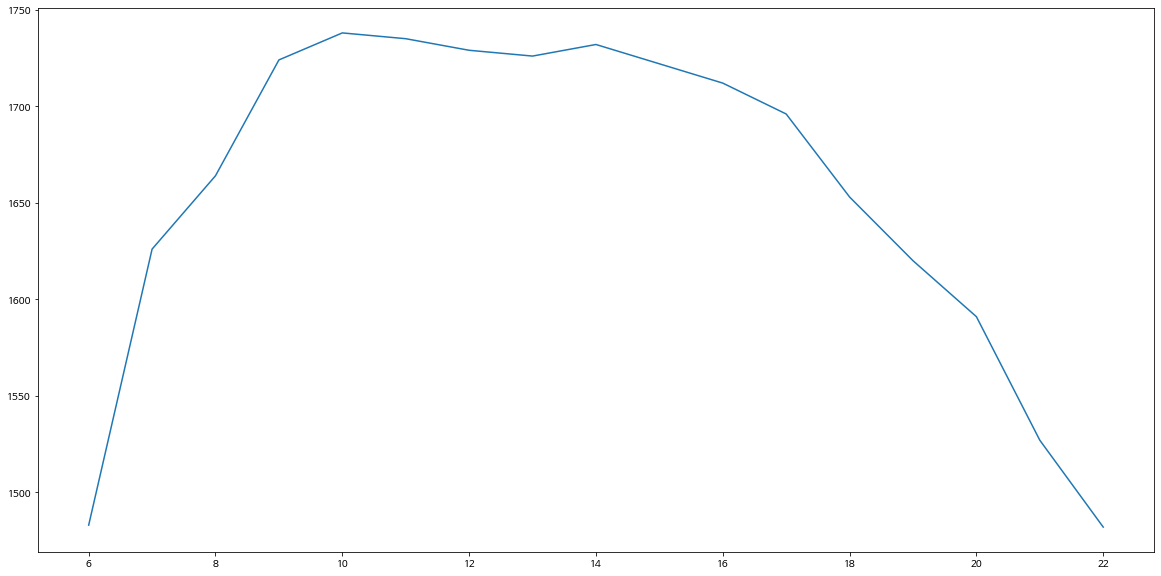

In [8]:
plt.figure(figsize=(20,10))
plt.plot(data_6_22_count_sorted.index, data_6_22_count_sorted.values)

In [40]:
x= data_6_22_count_sorted.index

In [41]:
labels=[str(i)+'시' for i in x]

In [15]:
labels

['6시',
 '7시',
 '8시',
 '9시',
 '10시',
 '11시',
 '12시',
 '13시',
 '14시',
 '15시',
 '16시',
 '17시',
 '18시',
 '19시',
 '20시',
 '21시',
 '22시']

In [42]:
y = data_6_22_count_sorted.values

In [17]:
y

array([1483, 1626, 1664, 1724, 1738, 1735, 1729, 1726, 1732, 1722, 1712,
       1696, 1653, 1620, 1591, 1527, 1482])

<function matplotlib.pyplot.show>

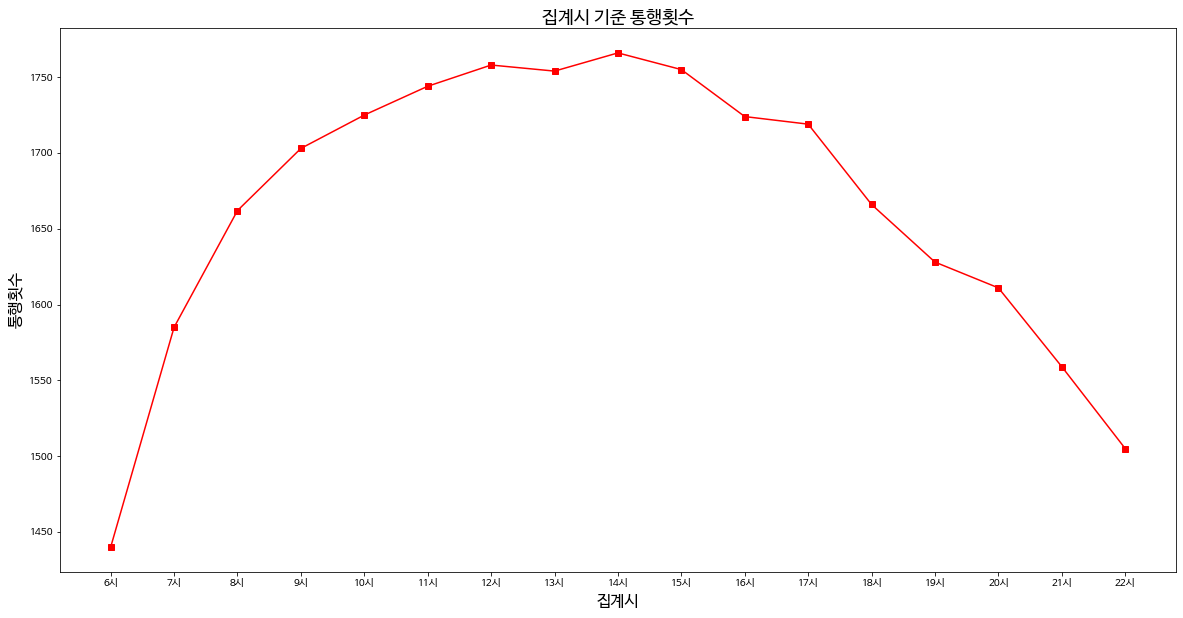

In [43]:
plt.figure(figsize=(20,10))
plt.plot(labels, y, marker='s', color='r')
plt.title('집계시 기준 통행횟수', fontsize =18)
plt.xlabel('집계시',fontdict={'size':16})
plt.ylabel('통행횟수',fontdict={'size':16})
plt.show

#6. 도착영업소코드

In [44]:
data_dest_counting = data['도착영업소코드'].value_counts()

In [45]:
data_dest_counting_sorted = data_dest_counting.sort_index()

In [46]:
x = [str(i) for i in x]

In [47]:
x = ['기흥','목천','대전','황간','남구미','동김천','경주','부산']

In [48]:
y = data_dest_counting_sorted.values

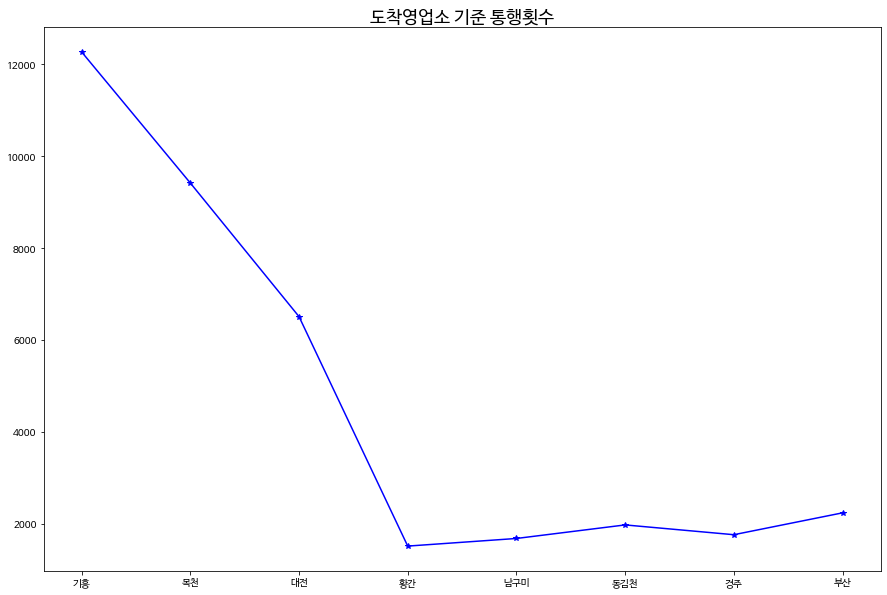

In [49]:
plt.figure(figsize=(15,10))
plt.plot(x,y, marker='*',color='b')
plt.title('도착영업소 기준 통행횟수', fontsize = 18)
plt.show()

#7.요일


In [53]:
data_week = data.groupby(by=['요일']).mean()

In [54]:
data_week_time = data_week['통행시간']

In [55]:
data_week

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간
요일,,,,,
0,2.020022e+07,11.734950,101.0,114.529922,4813.112783
1,2.020022e+07,11.691664,101.0,113.743022,4612.857648
2,2.020021e+07,11.902394,101.0,113.841621,4774.242357
3,2.020021e+07,11.929709,101.0,114.103057,4918.862530
4,2.020021e+07,11.923865,101.0,114.440886,5264.959004
5,2.020022e+07,11.463546,101.0,114.764006,5137.932272
6,2.020022e+07,12.400000,101.0,115.002099,4823.627282


In [56]:
data_week_time

요일
0    4813.112783
1    4612.857648
2    4774.242357
3    4918.862530
4    5264.959004
5    5137.932272
6    4823.627282
Name: 통행시간, dtype: float64

In [58]:
x=data_week_time.index

In [59]:
x

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='요일')

In [60]:
y = data_week_time.values
y

array([4813.11278329, 4612.85764793, 4774.24235727, 4918.86252975,
       5264.95900439, 5137.93227168, 4823.62728227])

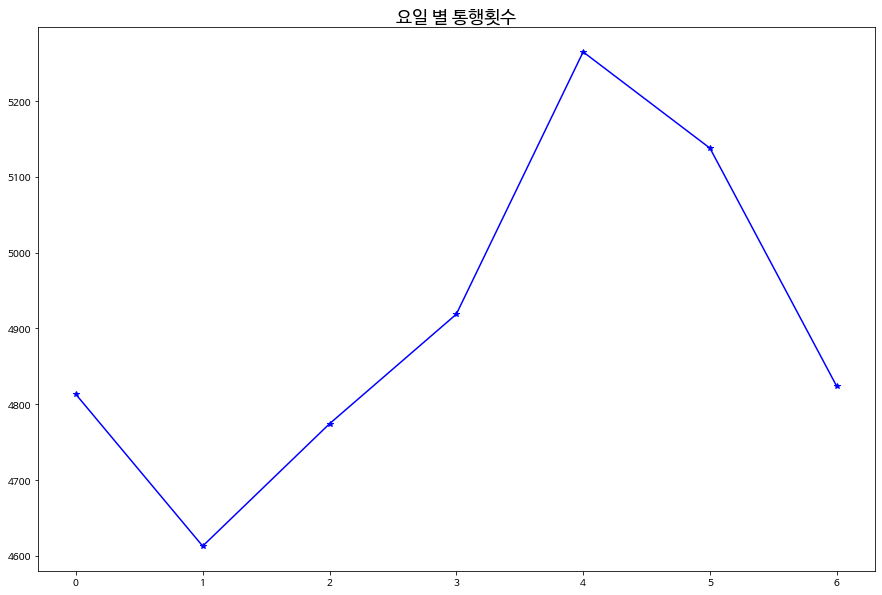

In [62]:
plt.figure(figsize=(15,10))
plt.plot(x,y, marker='*',color='b')
plt.title('요일 별 통행횟수', fontsize = 18)
plt.show()